# Reproduce results

<div style="color:red; font-size:14px;">!! Don't define functions here, import them from utils.py</div>

This notebook loads the trained models from disk and shows the results obtained with them.

## Imports

In [1]:
import os
import numpy as np
import scipy
import pickle

from utils import *

## Simple Solution Evaluation

### Load files related to the model

In [4]:
# Load the saved model
with open('model_artifacts/simple_solution/lr_model.pkl', 'rb') as file:
    lr_model = pickle.load(file)
with open('model_artifacts/simple_solution/X_tr_q1q2.pkl', 'rb') as file:
    X_train = pickle.load(file)
    X_train = scipy.sparse.csr_matrix(X_train)
with open('model_artifacts/simple_solution/y_tr.pkl', 'rb') as file:
    y_train = pickle.load(file)
with open('model_artifacts/simple_solution/X_va_q1q2.pkl', 'rb') as file:
    X_val = pickle.load(file)
    X_val = scipy.sparse.csr_matrix(X_val)
with open('model_artifacts/simple_solution/y_va.pkl', 'rb') as file:
    y_val = pickle.load(file)
with open('model_artifacts/simple_solution/X_te_q1q2.pkl', 'rb') as file:
    X_test = pickle.load(file)
    X_test = scipy.sparse.csr_matrix(X_test)
with open('model_artifacts/simple_solution/y_te.pkl', 'rb') as file:
    y_test = pickle.load(file)

#### Results

========== TRAIN SET ==========
accuracy: 0.8139960328472029
roc auc: 0.7875130914777011
precision: 0.782105697683034
recall: 0.6867257130642478
f1 score: 0.7313189097171362
log loss: 6.704262521056149


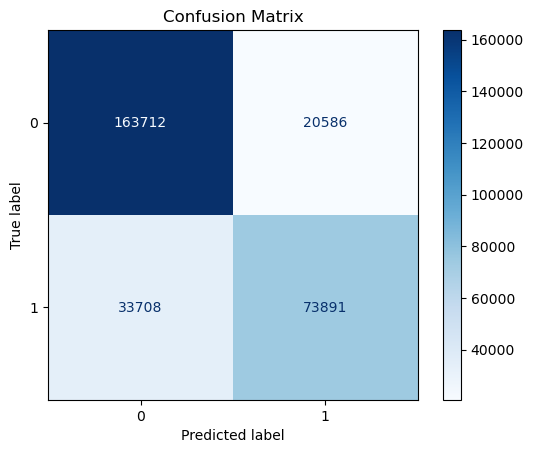

========== VALIDATION SET ==========
accuracy: 0.7490073553342446
roc auc: 0.7202410942192684
precision: 0.6772362497553337
recall: 0.6105523204517381
f1 score: 0.6421677802524128
log loss: 9.046691887550331


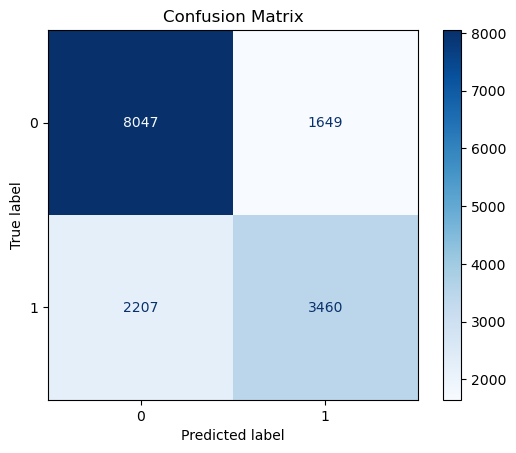

========== TEST SET ==========
accuracy: 0.7576057383131338
roc auc: 0.7291779200704606
precision: 0.6952291861552853
recall: 0.6186116197769269
f1 score: 0.6546863988724454
log loss: 8.736774751752364


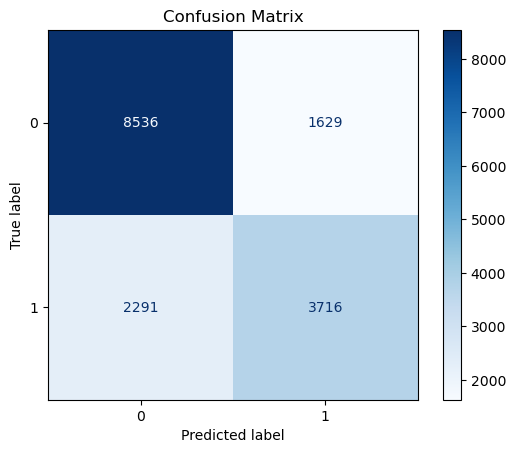

In [6]:
print('========== TRAIN SET ==========')
evaluate_model(lr_model, X_train, y_train)
print('========== VALIDATION SET ==========')
evaluate_model(lr_model, X_val, y_val)
print('========== TEST SET ==========')
evaluate_model(lr_model, X_test, y_test)